In [376]:
from pandas import DataFrame, read_csv
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, accuracy_score
from numpy import transpose
from math import sqrt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Activation, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras import regularizers
from time import time
#tf.debugging.set_log_device_placement(True)
print(tf.__version__)

2.0.0


In [377]:
from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

#a = tf.constant([[1.0, 2.0, 3.0], [4.0, 5.0, 6.0]])
#b = tf.constant([[1.0, 2.0], [3.0, 4.0], [5.0, 6.0]])
#c = tf.matmul(a, b)

#print(c)

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 18273825228795323621
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 1695219712
locality {
  bus_id: 1
  links {
  }
}
incarnation: 4168660481214964271
physical_device_desc: "device: 0, name: Quadro K2100M, pci bus id: 0000:01:00.0, compute capability: 3.0"
]


In [378]:
X_train = read_csv('X_train.csv', index_col=0)
X_val = read_csv('X_val.csv', index_col=0)
test = read_csv('X_test.csv', index_col=0)
y_train = read_csv('y_train.csv', index_col=0)
y_val = read_csv('y_val.csv', index_col=0)

In [18]:
y_train = y_train.SalePrice.values.astype(float)
y_val = y_val.SalePrice.values.astype(float)

In [134]:
X_train = transpose([X_train.Surface.values.astype(float)])
X_val = transpose([X_val.Surface.values.astype(float)])

In [379]:
X_train.shape

(1166, 77)

In [380]:
y_train = y_train.values.astype(float)
y_val = y_val.values.astype(float)

In [381]:
#X_train = X_train[['Surface','OverallQual']].values.astype(float)
#X_val = X_val[['Surface','OverallQual']].values.astype(float)
X_train = X_train.values.astype(float)
X_val = X_val.values.astype(float)

In [382]:
X_train.shape

(1166, 77)

In [383]:
model = Sequential()
model.add(Input(shape=X_train.shape[1]))
model.add(Dense(32, kernel_initializer='normal', activation='relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dense(1))

In [ ]:
model = Sequential([
    Input(shape=X_train.shape[1:]),
    Dense(1)
])

In [384]:
loss = 'mse'

In [385]:
from tensorflow.keras.optimizers import SGD,RMSprop,Adam
LEARNING_RATE = 0.001
model.compile(loss=loss, optimizer=SGD(lr=LEARNING_RATE))
#model.compile(loss=loss, optimizer=RMSprop(lr=LEARNING_RATE))
#model.compile(loss=loss, optimizer=Adam(lr=LEARNING_RATE))

In [386]:
BATCH_SIZE = X_train.shape[0] # computing the loss over the whole dataset
EPOCHS = 2000 # how many iterations over the whole dataset
t_0 = time()
#with tf.device('/device:GPU:0'):
history = model.fit(X_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, verbose=0)
print(time()-t_0)

6.0441083908081055


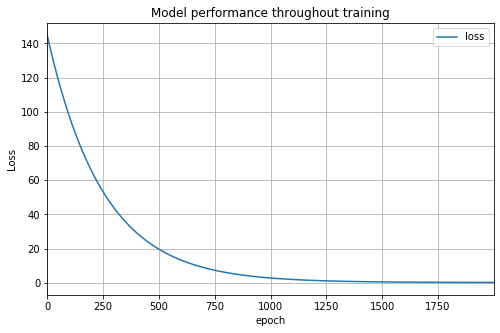

In [387]:
DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
#plt.gca().set_ylim(0, 1)
plt.title('Model performance throughout training')
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.show()

In [388]:
y_pred = model.predict(X_val)

In [389]:
RMSLE = sqrt(mean_squared_error(y_val,y_pred))
RMSLE

0.4395660741987823